# The New Bechdel test!
Analysis Character metadata in this notebook

In [1]:
import csv
import pandas as pd
import re
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from unidecode import unidecode
import pickle
from sklearn.feature_extraction import DictVectorizer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from plotly import tools

In [2]:
mcm_df = pd.read_csv("mcm_csv.csv")

In [3]:
mcm_df.describe()

,Character_Id,Character_Name,Movie_Number,Movie_Title,Gender,Position_in_Credits
count,9033,9033,9033,9033,9033,9033
unique,9033,5355,617,617,4,57
top,u1493,MAN,m289,casino,m,?
freq,1,44,44,44,6014,6354


In [4]:
mcm_df.Gender.unique()

array(['f', 'm', 'M', 'F'], dtype=object)

In [5]:
# Since, there are 4 types of same gender characters let's condense them
mcm_df['Gender'] = mcm_df['Gender'].apply(lambda x: chr(ord(x)+32) if ord(x) > 65 and ord(x) < 90 else x)

In [6]:
mcm_df.Gender.unique()
# Now we have only two characters

array(['f', 'm'], dtype=object)

In [7]:
mcm_df.Gender.describe()

count     9033
unique       2
top          m
freq      6164
Name: Gender, dtype: object

In [8]:
mcm_df.Gender.value_counts()

m    6164
f    2869
Name: Gender, dtype: int64

# Meaning,
There are a total of : <br>
6164 Male Characters <br>
2869 Female Characters in the entire dataset. <br>

So, out of 617 movies with a total character count of 9033 in all of those movies we get : <br>
Female % = 2869 / 9033 * 100 = 31.76132% <br>
Male % = 6164 / 9033 * 100 = 63.23868% <br>
Altough the female % is quite grim, this doesn't represent us with a good background of for speaking about the diversity. <br>
Let's dig deeper <br>
# Consider the conversations metadata for Nurse Betty (m152)

In [9]:
# Lets, import the dataframe
mc_df = pd.read_csv("mc_csv.csv")

In [10]:
mc_df.describe()

,Character_Id1,Character_Id2,Movie_Number,List_of_Utterance
count,83097,83097,83097,83097
unique,5420,5608,617,83097
top,u4331,u1475,m289,"['L503448', 'L503449']"
freq,193,187,338,1


In [11]:
# So, the columns here in this dataset mention that characterId1 
# is the charcter speking to characterId2 in each movies
m_df = mc_df.loc[mc_df['Movie_Number'] == 'm152']

In [12]:
m_df.describe()

,Character_Id1,Character_Id2,Movie_Number,List_of_Utterance
count,223,223,223,223
unique,12,17,1,223
top,u2369,u2389,m152,"['L423498', 'L423499']"
freq,101,60,223,1


In [13]:
m_df.Character_Id1.unique()

array(['u2368', 'u2369', 'u2370', 'u2371', 'u2374', 'u2379', 'u2380',
       'u2381', 'u2382', 'u2385', 'u2387', 'u2388'], dtype=object)

In [14]:
m_df.Character_Id2.unique()

array(['u2375', 'u2369', 'u2387', 'u2382', 'u2371', 'u2372', 'u2388',
       'u2379', 'u2374', 'u2378', 'u2384', 'u2386', 'u2383', 'u2376',
       'u2389', 'u2377', 'u2373'], dtype=object)

In [15]:
m1_df = mcm_df.loc[mcm_df['Movie_Number'] == 'm152']
# Which has 22 characters

In [16]:
print("Number of characters:", m1_df.shape[0])
m1_df.head()

('Number of characters:', 22)


,Character_Id,Character_Name,Movie_Number,Movie_Title,Gender,Position_in_Credits
2368,u2368,BALLARD,m152,nurse betty,m,8
2369,u2369,BETTY,m152,nurse betty,f,2
2370,u2370,BLAKE,m152,nurse betty,m,?
2371,u2371,CHARLIE,m152,nurse betty,m,1
2372,u2372,CHIEF NURSE,m152,nurse betty,f,?


In [17]:
print("Number of conversations:", m_df.shape[0])
m_df.head()

('Number of conversations:', 223)


,Character_Id1,Character_Id2,Movie_Number,List_of_Utterance
21699,u2368,u2375,m152,"['L423645', 'L423646', 'L423647', 'L423648', '..."
21700,u2368,u2375,m152,"['L423656', 'L423657', 'L423658', 'L423659']"
21701,u2368,u2369,m152,"['L423341', 'L423342', 'L423343', 'L423344']"
21702,u2368,u2369,m152,"['L423714', 'L423715', 'L423716', 'L423717', '..."
21703,u2368,u2369,m152,"['L424468', 'L424469']"


In [18]:
new_df = pd.DataFrame(columns = ['Character_Id1', 'Character_Id2', 'Gender1', 
                                 'Gender2', 'List_of_Utterance', 'Movie_Number',
                                 'Movie_Title', 'Name1', 'Name2'])

In [19]:
new_df = new_df.append(m_df, ignore_index = True)

In [20]:
for index, rows in new_df.iterrows():
    rows[2] = m1_df.loc[m1_df.Character_Id == rows[0], 'Gender'].iloc[0]
    rows[3] = m1_df.loc[m1_df.Character_Id == rows[1], 'Gender'].iloc[0]
    rows[6] = m1_df.loc[m1_df.Movie_Number == rows[5], 'Movie_Title'].iloc[0]
    rows[7] = m1_df.loc[m1_df.Character_Id == rows[0], 'Character_Name'].iloc[0]
    rows[8] = m1_df.loc[m1_df.Character_Id == rows[1], 'Character_Name'].iloc[0]

In [21]:
# Our final DF for the movie
new_df

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u2368,u2375,m,m,"['L423645', 'L423646', 'L423647', 'L423648', '...",m152,nurse betty,BALLARD,DOCTOR
1,u2368,u2375,m,m,"['L423656', 'L423657', 'L423658', 'L423659']",m152,nurse betty,BALLARD,DOCTOR
2,u2368,u2369,m,f,"['L423341', 'L423342', 'L423343', 'L423344']",m152,nurse betty,BALLARD,BETTY
3,u2368,u2369,m,f,"['L423714', 'L423715', 'L423716', 'L423717', '...",m152,nurse betty,BALLARD,BETTY
4,u2368,u2369,m,f,"['L424468', 'L424469']",m152,nurse betty,BALLARD,BETTY
5,u2368,u2387,m,m,"['L423338', 'L423339', 'L423340']",m152,nurse betty,BALLARD,ROY
6,u2368,u2387,m,m,"['L423345', 'L423346', 'L423347', 'L423348']",m152,nurse betty,BALLARD,ROY
7,u2368,u2387,m,m,"['L423350', 'L423351', 'L423352', 'L423353', '...",m152,nurse betty,BALLARD,ROY
8,u2368,u2387,m,m,"['L423592', 'L423593', 'L423594', 'L423595', '...",m152,nurse betty,BALLARD,ROY
9,u2368,u2387,m,m,"['L423605', 'L423606']",m152,nurse betty,BALLARD,ROY


In [22]:
new_df.describe()

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
count,223,223,223,223,223,223,223,223,223
unique,12,17,2,2,223,1,1,12,17
top,u2369,u2389,m,m,"['L423498', 'L423499']",m152,nurse betty,BETTY,WESLEY
freq,101,60,112,150,1,223,223,101,60


In [23]:
# Let's look deeper into the data for this movie
print(new_df.Gender1.value_counts())
print(new_df.Gender2.value_counts())

m    112
f    111
Name: Gender1, dtype: int64
m    150
f     73
Name: Gender2, dtype: int64


In [24]:
# Visualization on the year of realese to get the idea of movie years we are working with
data = [go.Histogram(
            x=new_df['Name1'],
            marker = dict(color = 'rgb(17, 157, 100)'),
            hoverlabel = dict(bordercolor = 'rgb(0, 0, 0)')
        )]
layout = go.Layout(
    title = 'Name1 list of utterance',
    xaxis=dict(
        title='Character Names'
    ),
    yaxis=dict(
        title='Counts of Utterances'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-histogram')

In [25]:
# Visualization on the year of realese to get the idea of movie years we are working with
data = [go.Histogram(
            x=new_df['Name2'],
            marker = dict(color = 'rgb(255, 0, 127)'),
            hoverlabel = dict(bordercolor = 'rgb(1, 1, 1)')
        )]
layout = go.Layout(
    title = 'Name2 list of utternaces',
    xaxis=dict(
        title='Name2'
    ),
    yaxis=dict(
        title='Counts of Utterances'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-histogram')

# Graph visualization using Pydot and Graphviz

In [26]:
import pydot
import graphviz
from IPython.display import Image, display

In [27]:
G = pydot.Dot(graph_type="digraph")

In [28]:
# Add nodes as all the characters in the movie Nurse Betty
for index, rows in m1_df.iterrows():
    node = pydot.Node(rows[1], style="filled", fillcolor="yellow")
    G.add_node(node)

In [29]:
# Add edges between these nodes based on the other dataframe
for index, rows in new_df.iterrows():
    edge = pydot.Edge(rows[7], rows[8])
    G.add_edge(edge)

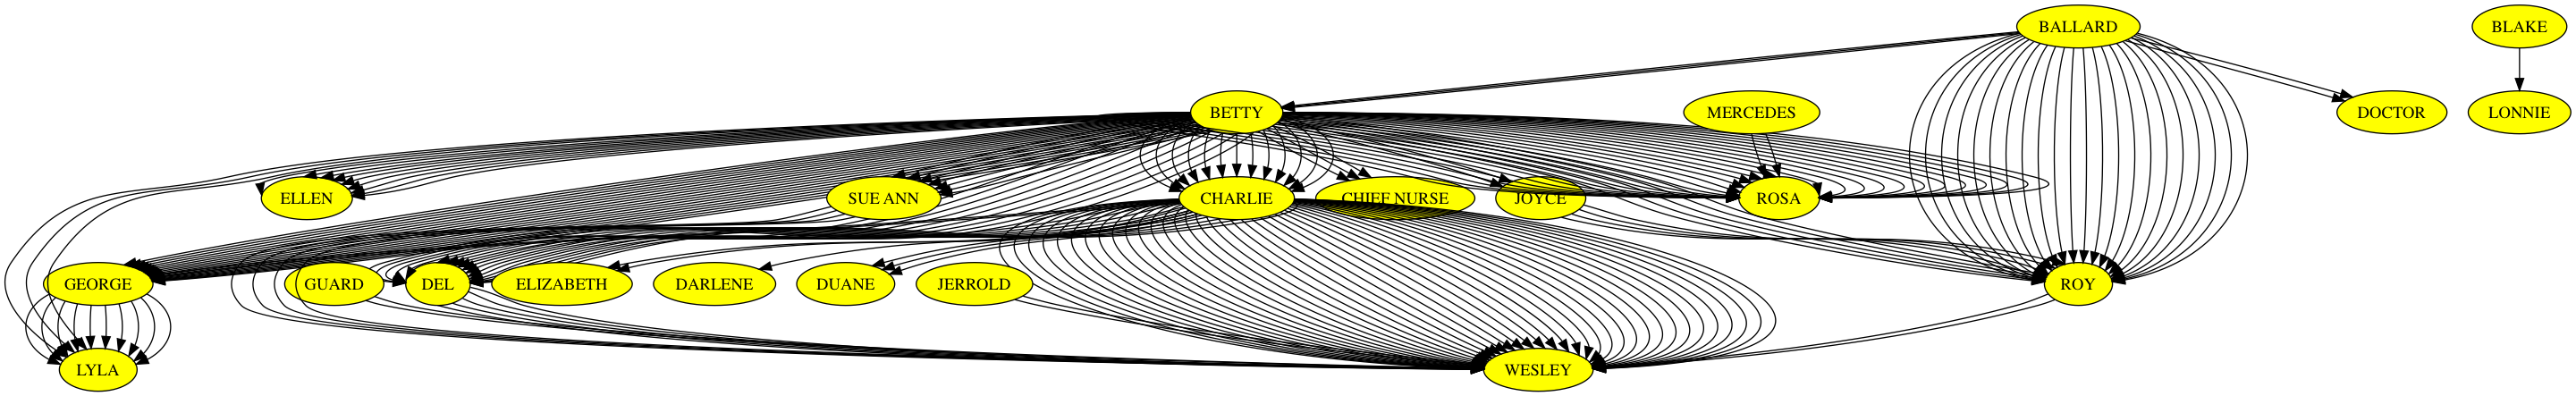

In [30]:
im = Image(G.create_png(), width="5000px", height="5000px")
display(im)

In [31]:
# Trying to do something like this using Plotly
edge_trace = go.Scatter(
    x=[],
    line=dict(width=1.0,color='#888'))

In [32]:
for index, rows in new_df.iterrows():
    edge_trace['x'] += tuple([rows[7], rows[8], None])

In [33]:
fig = go.Figure(data=[edge_trace],
             layout=go.Layout(
                 title='<br>Network graph made with Python',
                 xaxis=dict(
                     title="Characters"
                 ),
                 yaxis=dict(
                     title="Dialogue numbers"
                 )
                ))

py.iplot(fig, filename='networkx')

# Consider the conversations metadata for Indiana Jones and the temple of doom (m99)

In [34]:
# So, the columns here in this dataset mention that characterId1 
# is the charcter speking to characterId2 in each movies
m99_df = mc_df.loc[mc_df['Movie_Number'] == 'm99']

In [35]:
m99_df.describe()

,Character_Id1,Character_Id2,Movie_Number,List_of_Utterance
count,138,138,138,138
unique,4,7,1,138
top,u1463,u1468,m99,"['L300221', 'L300222', 'L300223', 'L300224', '..."
freq,103,84,138,1


In [36]:
m99_df.Character_Id1.unique()

array(['u1461', 'u1462', 'u1463', 'u1467'], dtype=object)

In [37]:
m99_df.Character_Id2.unique()

array(['u1462', 'u1463', 'u1468', 'u1464', 'u1467', 'u1465', 'u1466'],
      dtype=object)

In [38]:
m991_df = mcm_df.loc[mcm_df['Movie_Number'] == 'm99']
# Which has 22 characters

In [39]:
print("Number of characters:", m991_df.shape[0])
m991_df.head()

('Number of characters:', 8)


,Character_Id,Character_Name,Movie_Number,Movie_Title,Gender,Position_in_Credits
1461,u1461,CAPT. BLUMBURTT,m99,indiana jones and the temple of doom,m,?
1462,u1462,CHATTAR LAL,m99,indiana jones and the temple of doom,f,?
1463,u1463,INDIANA,m99,indiana jones and the temple of doom,m,1
1464,u1464,LAO,m99,indiana jones and the temple of doom,m,?
1465,u1465,MOLA RAM,m99,indiana jones and the temple of doom,f,?


In [40]:
print("Number of conversations:", m99_df.shape[0])
m99_df.head()

('Number of conversations:', 138)


,Character_Id1,Character_Id2,Movie_Number,List_of_Utterance
13514,u1461,u1462,m99,"['L300310', 'L300311', 'L300312']"
13515,u1461,u1462,m99,"['L300342', 'L300343']"
13516,u1461,u1462,m99,"['L300570', 'L300571', 'L300572']"
13517,u1461,u1463,m99,"['L300316', 'L300317']"
13518,u1461,u1463,m99,"['L300318', 'L300319', 'L300320', 'L300321', '..."


In [41]:
new2_df = pd.DataFrame(columns = ['Character_Id1', 'Character_Id2', 'Gender1', 
                                 'Gender2', 'List_of_Utterance', 'Movie_Number',
                                 'Movie_Title', 'Name1', 'Name2'])

In [42]:
new2_df = new2_df.append(m99_df, ignore_index = True)

In [43]:
for index, rows in new2_df.iterrows():
    rows[2] = m991_df.loc[m991_df.Character_Id == rows[0], 'Gender'].iloc[0]
    rows[3] = m991_df.loc[m991_df.Character_Id == rows[1], 'Gender'].iloc[0]
    rows[6] = m991_df.loc[m991_df.Movie_Number == rows[5], 'Movie_Title'].iloc[0]
    rows[7] = m991_df.loc[m991_df.Character_Id == rows[0], 'Character_Name'].iloc[0]
    rows[8] = m991_df.loc[m991_df.Character_Id == rows[1], 'Character_Name'].iloc[0]

In [44]:
# Our final DF for the movie
new2_df

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
0,u1461,u1462,m,f,"['L300310', 'L300311', 'L300312']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,CHATTAR LAL
1,u1461,u1462,m,f,"['L300342', 'L300343']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,CHATTAR LAL
2,u1461,u1462,m,f,"['L300570', 'L300571', 'L300572']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,CHATTAR LAL
3,u1461,u1463,m,m,"['L300316', 'L300317']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
4,u1461,u1463,m,m,"['L300318', 'L300319', 'L300320', 'L300321', '...",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
5,u1461,u1463,m,m,"['L300323', 'L300324']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
6,u1461,u1463,m,m,"['L300325', 'L300326']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
7,u1461,u1463,m,m,"['L300359', 'L300360']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
8,u1461,u1463,m,m,"['L300379', 'L300380']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA
9,u1461,u1463,m,m,"['L300563', 'L300564', 'L300565']",m99,indiana jones and the temple of doom,CAPT. BLUMBURTT,INDIANA


In [45]:
new2_df.describe()

,Character_Id1,Character_Id2,Gender1,Gender2,List_of_Utterance,Movie_Number,Movie_Title,Name1,Name2
count,138,138,138,138,138,138,138,138,138
unique,4,7,2,2,138,1,1,4,7
top,u1463,u1468,m,f,"['L300221', 'L300222', 'L300223', 'L300224', '...",m99,indiana jones and the temple of doom,INDIANA,WILLIE
freq,103,84,121,92,1,138,138,103,84


In [46]:
# Let's look deeper into the data for this movie
print(new2_df.Gender1.value_counts())
print(new2_df.Gender2.value_counts())

m    121
f     17
Name: Gender1, dtype: int64
f    92
m    46
Name: Gender2, dtype: int64


In [47]:
# Visualization on the year of realese to get the idea of movie years we are working with
data = [go.Histogram(
            x=new2_df['Name1'],
            marker = dict(color = 'rgb(17, 157, 100)'),
            hoverlabel = dict(bordercolor = 'rgb(0, 0, 0)')
        )]
layout = go.Layout(
    title = 'Name2 list of utterance',
    xaxis=dict(
        title='Character Names'
    ),
    yaxis=dict(
        title='Counts of Utterances'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-histogram')

In [48]:
# Visualization on the year of realese to get the idea of movie years we are working with
data = [go.Histogram(
            x=new2_df['Name2'],
            marker = dict(color = 'rgb(17, 157, 100)'),
            hoverlabel = dict(bordercolor = 'rgb(0, 0, 0)')
        )]
layout = go.Layout(
    title = 'Name1 list of utterance',
    xaxis=dict(
        title='Character Names'
    ),
    yaxis=dict(
        title='Counts of Utterances'
    ),
    bargap=0.2
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-histogram')

In [49]:
G2 = pydot.Dot(graph_type="digraph")

In [50]:
# Add nodes as all the characters in the movie Nurse Betty
for index, rows in m991_df.iterrows():
    node = pydot.Node(rows[1], style="filled", fillcolor="yellow")
    G2.add_node(node)

In [51]:
# Add edges between these nodes based on the other dataframe
for index, rows in new2_df.iterrows():
    edge = pydot.Edge(rows[7], rows[8])
    G2.add_edge(edge)

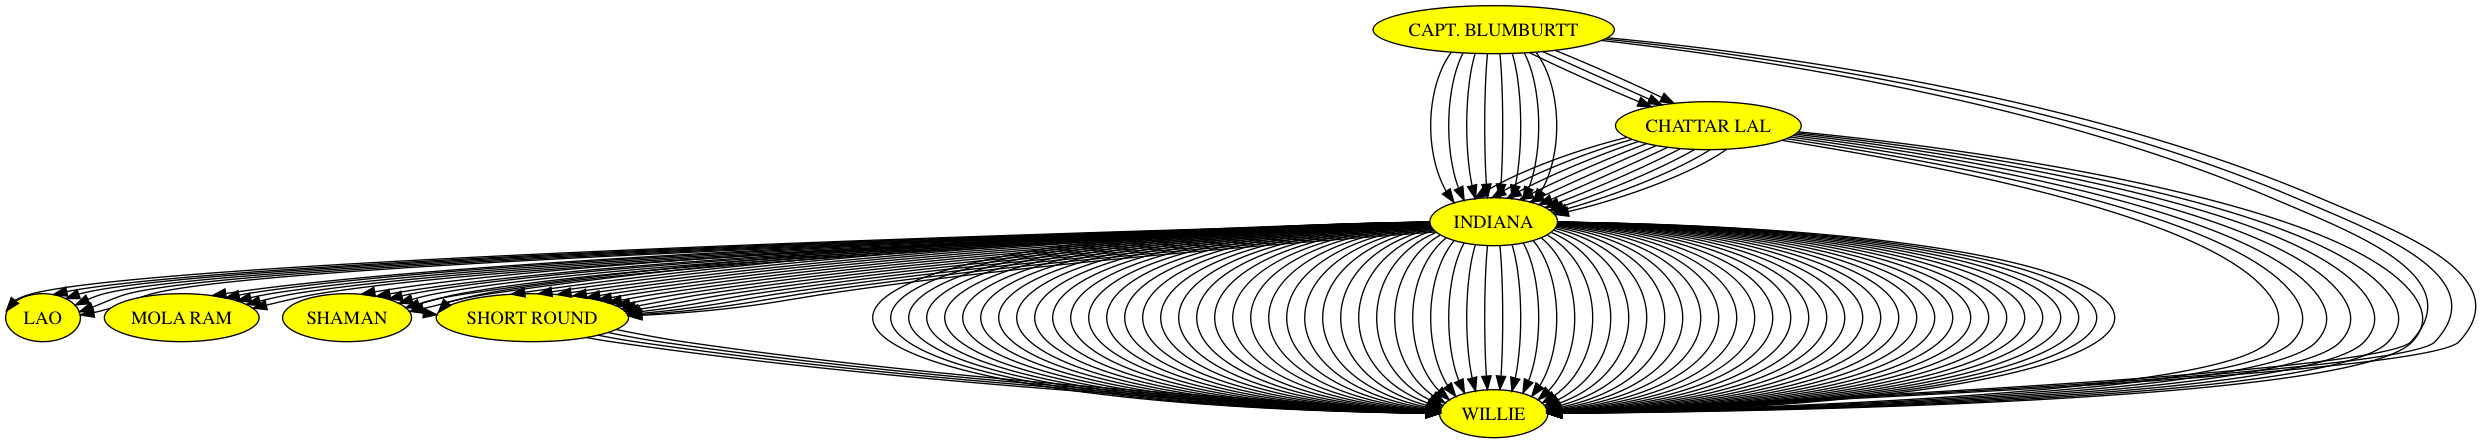

In [52]:
im = Image(G2.create_png(), width="5000px", height="5000px")
display(im)

In [53]:
# Trying to do something like this using Plotly
edge_trace = go.Scatter(
    x=[],
    line=dict(width=1.0,color='#888'))

In [54]:
for index, rows in new2_df.iterrows():
    edge_trace['x'] += tuple([rows[7], rows[8], None])

In [55]:
fig = go.Figure(data=[edge_trace],
             layout=go.Layout(
                 title='<br>Network graph made with Python',
                 xaxis=dict(
                     title="Characters"
                 ),
                 yaxis=dict(
                     title="Dialogue numbers"
                 )
                ))

py.iplot(fig, filename='networkx')